In [2]:
import hhgen.io as io
import hhgen.utils as utils
import matplotlib.pyplot as plt
import numpy as np
import skhep.math as skp

Welcome to ROOTaaS 6.06/05


In [3]:
files = ! ls /t3home/musella/Analysis/HH_8_0_28/src/HHbbgg_ETH/Flashgg/work/gen_analysis/*madgraph.root

In [4]:
reload(io)
def get_data(fname,proc):
    tdir = 'genDiphotonDumper/trees'

    untagged = tdir+'/'+proc+'_13TeV_NoTag_0'
    tagged = tdir+'/'+proc+'_13TeV_DoubleHTag_%d'

    return io.read_trees(fname,untagged,tagged,12) 

In [5]:
#hgg=H to 2 photons
#hbb=H to 2 b jets
#hh=H to 2 Higgs
reload(utils)
def calc_features(df):
    for part in "leadPho","subleadPho","leadJet","subleadJet":
        utils.calc_p4extra(df,part) #calculating pt, eta, phi, m for each 
    utils.calc_sump4(df,"hgg","leadPho","subleadPho") #calculating pt, eta, phi, m for sum of 2 photons
    utils.calc_sump4(df,"hbb","leadJet","subleadJet") #calculating pt, eta, phi, m for sum of 2 b jets
    utils.calc_sump4(df,"hh","hbb","hgg") #calculating pt, eta, phi, m for sum of 2 Higgs
    
    df["mtilda_x"]=df["hh_m"]-df["mgg"]-df["mbb"]+250.0 
    df["hgg_pt_hh_m"]=df["hgg_pt"]/df["hh_m"]
    df["hbb_pt_hh_m"]=df["hbb_pt"]/df["hh_m"]
    
    utils.calc_cos_theta_cs(df) #angle in Collins Sopper frame
    utils.calc_cos_theta(df,"hbb","leadJet") #helicity angles
    utils.calc_cos_theta(df,"hgg","leadPho")

In [6]:
import os

dfs = {}
for ifil in files:
    fname = os.path.basename(ifil) #output_GluGluToHHTo2B2G_node_10_13TeV-madgraph.root
    proc = fname.replace("output_","").replace(".root","").replace("-","_") #GluGluToHHTo2B2G_node_10_13TeV_madgraph
    df = get_data(ifil,proc)
    proc = proc.replace("GluGluToHHTo2B2G_","").replace("_13TeV_madgraph","")#node_10
    calc_features(df)
    dfs[proc] = df

In [7]:
dfs["node_SM"].columns

Index([u'candidate_id', u'weight', u'mgg', u'mbb', u'leadPho_px',
       u'leadPho_py', u'leadPho_pz', u'leadPho_e', u'subleadPho_px',
       u'subleadPho_py', u'subleadPho_pz', u'subleadPho_e', u'leadJet_px',
       u'leadJet_py', u'leadJet_pz', u'leadJet_e', u'subleadJet_px',
       u'subleadJet_py', u'subleadJet_pz', u'subleadJet_e', u'rho', u'nvtx',
       u'event', u'lumi', u'processIndex', u'run', u'npu', u'puweight', u'cat',
       u'leadPho_pt', u'leadPho_eta', u'leadPho_phi', u'leadPho_m',
       u'subleadPho_pt', u'subleadPho_eta', u'subleadPho_phi', u'subleadPho_m',
       u'leadJet_pt', u'leadJet_eta', u'leadJet_phi', u'leadJet_m',
       u'subleadJet_pt', u'subleadJet_eta', u'subleadJet_phi', u'subleadJet_m',
       u'hgg_px', u'hgg_py', u'hgg_pz', u'hgg_e', u'hgg_pt', u'hgg_eta',
       u'hgg_phi', u'hgg_m', u'hbb_px', u'hbb_py', u'hbb_pz', u'hbb_e',
       u'hbb_pt', u'hbb_eta', u'hbb_phi', u'hbb_m', u'hh_px', u'hh_py',
       u'hh_pz', u'hh_e', u'hh_pt', u'hh_eta', u'hh

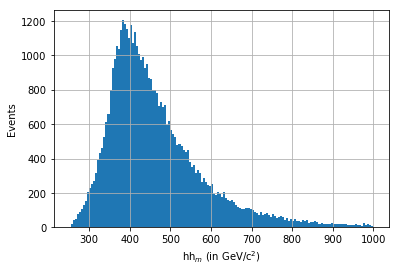

In [8]:
dfs["node_SM"].hh_m.hist(range=[250,1000],bins=150)
plt.ylabel("Events")
plt.xlabel("hh$_m$ (in GeV/c$^2$)")
plt.show()

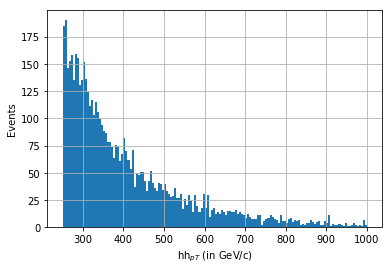

In [27]:
dfs["node_SM"].hh_pt.hist(range=[250,1000],bins=150)
plt.ylabel("Events")
plt.xlabel("hh$_{pT}$ (in GeV/c)")
plt.show()

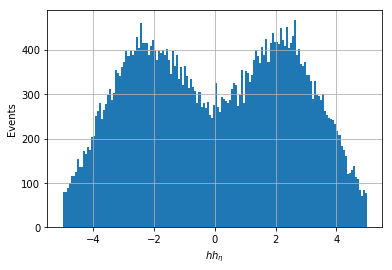

In [10]:
dfs["node_SM"].hh_eta.hist(range=[-5,5],bins=150)
plt.ylabel("Events")
plt.xlabel("$hh_{\eta}$")
plt.show()

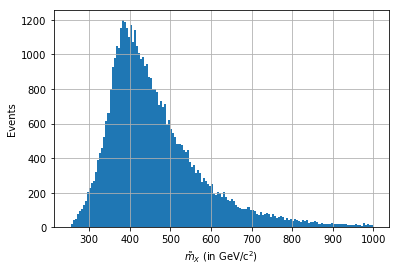

In [11]:
dfs["node_SM"].mtilda_x.hist(range=[250,1000],bins=150)
plt.ylabel("Events")
plt.xlabel("$\~{m}_X$ (in GeV/c$^2$)")
plt.show()

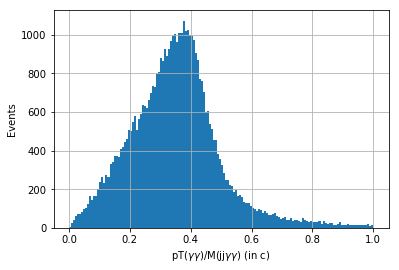

In [12]:
dfs["node_SM"].hgg_pt_hh_m.hist(range=[0,1],bins=150)
plt.ylabel("Events")
plt.xlabel("pT($\gamma\gamma$)/M(jj$\gamma\gamma$) (in c)")
plt.show()

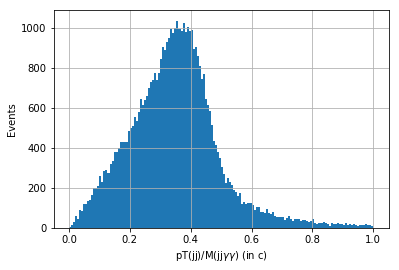

In [13]:
dfs["node_SM"].hbb_pt_hh_m.hist(range=[0,1],bins=150)
plt.ylabel("Events")
plt.xlabel("pT(jj)/M(jj$\gamma\gamma$) (in c)")
plt.show()

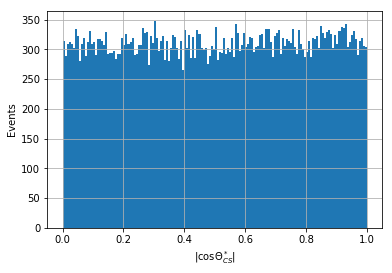

In [22]:
np.abs(dfs["node_SM"].cos_theta_cs).hist(bins=150)
plt.ylabel("Events")
plt.xlabel("|cos$\Theta_{CS}^*$|")
plt.show()

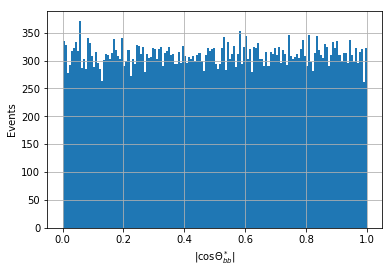

In [23]:
np.abs(dfs["node_SM"].cos_theta_hbb).hist(bins=150)
plt.ylabel("Events")
plt.xlabel("|cos$\Theta_{bb}^*$|")
plt.show()

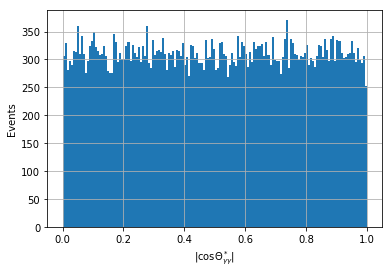

In [24]:
np.abs(dfs["node_SM"].cos_theta_hgg).hist(bins=150)
plt.ylabel("Events")
plt.xlabel("|cos$\Theta_{\gamma\gamma}^*$|")
plt.show()

In [17]:
#hdf: hierarchial data format

for proc,df in dfs.items():
    df.to_hdf(proc+".hd5",proc,mode="w") #mode w: write

In [18]:
! ls *.hd5

node_10.hd5  node_13.hd5  node_4.hd5  node_7.hd5  node_box.hd5
node_11.hd5  node_2.hd5   node_5.hd5  node_8.hd5  node_SM.hd5
node_12.hd5  node_3.hd5   node_6.hd5  node_9.hd5


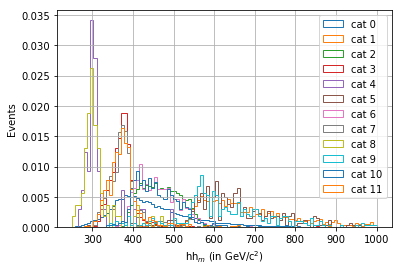

In [25]:
gbycat = dfs["node_SM"].groupby('cat')

for icat in range(12):
    dfc = gbycat.get_group(icat)
    dfc.hh_m.hist(range=[250,1000],bins=100,normed=True,histtype="step",label="cat %d" % icat) 
plt.ylabel("Events")
plt.xlabel("hh$_m$ (in GeV/c$^2$)")
plt.legend()
plt.show()

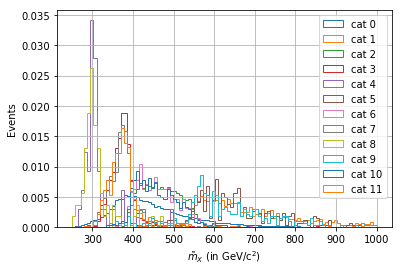

In [26]:
gbycat = dfs["node_SM"].groupby('cat')

for icat in range(12):
    dfc = gbycat.get_group(icat)
    dfc.mtilda_x.hist(range=[250,1000],bins=100,normed=True,histtype="step",label="cat %d" % icat)  
plt.ylabel("Events")
plt.xlabel("$\~{m}_X$ (in GeV/c$^2$)")
plt.legend()
plt.show()